# Navigation

---

In this notebook, we will learn how to use the Unity ML-Agents environment for the first project navigation.

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

<img src="results/navigation.gif">

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from IPython.core.debugger import set_trace



Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('brain name: {}'.format(brain_name))

brain name: BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, we will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, we will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

As part of the project, we'll change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    #print('action:{}, reward:{}, done:{}'.format(action, score, done))
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score of agent using random policy: {}".format(score))

Score of agent using random policy: 1.0


Closing the environment before starting in training mode.

In [ ]:
env.close()

### 4. Train the Agent with DQN!

Refer to start.py to see training code. Our agent is defined in dqn_agent. It uses basic DQN implementation. When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import start

scores = start.run()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
INFO:bananagent:Agent init: state:37, action:4


Episode 100	Average Score: 1.06	decay:0.548
Episode 200	Average Score: 5.27	decay:0.300
Episode 300	Average Score: 9.31	decay:0.164
Episode 400	Average Score: 12.10	decay:0.090
Environment solved in 460 episodes


### Training plot
We can see the agent actions are not very smooth. There is lot of jitter in the movements. Some of the hyper parameters and results as follows.
```
Batch size    : 256
Discount rate : 0.98
TAU           : 1e-3
LR            : 1e-4
Experience lag: 4
1. eps_decay 0.997 - score 16 after 1080 episodes
2. eps_decay 0.996 - score 13.72 @ 690 / decay 0.060
3. eps_start 0.8 - score 13 @ 740 episodes
```

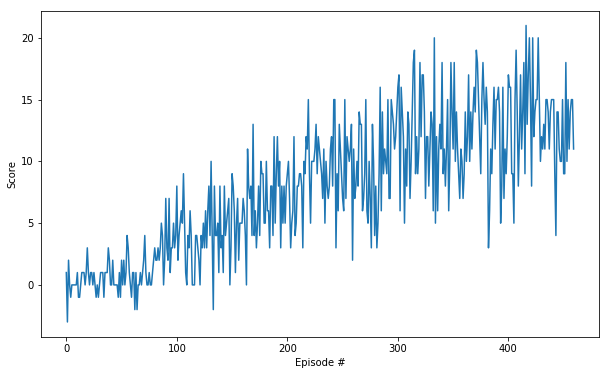

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



### Epsilon decay plot
Exploration vs exploitation

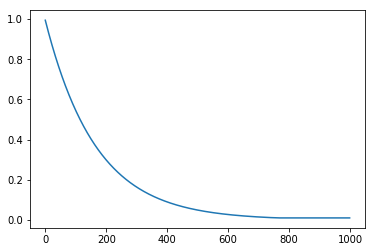

In [6]:
import matplotlib.pyplot as plt
import numpy as np

eps_array = []
eps = 1.0
eps_decay = 0.994
for i in range(1000):
    eps = max(0.01, eps_decay*eps)
    eps_array.append(eps)
    

plt.plot(np.arange(len(eps_array)), eps_array)
plt.show()

### Trained agent Behaviour

In [1]:
from dqn_agent import Agent
from unityagents import UnityEnvironment
import torch
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [ ]:

agent = Agent(state_size=37, action_size=4, seed=0)
agent.network_local.load_state_dict(torch.load('checkpoint.pth'))
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action = agent.act(state, 0.2)                 # select an action with 20% exploration
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    #print('action:{}, reward:{}, done:{}'.format(action, score, done))
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

INFO:bananagent:Agent init: state:37, action:4


### Trained agent in the environment.

<img src="results/navigation_unseen.gif">

In [ ]:
env.close()

### Summary
The following observations were made in this exercise:
    1. Eps decay and hence mse_error effects exploration duration.
    2. Various architectures were tried (as defined in models.py). No significant differences were found in either training time or overall scores. Final model has 4 layers, they very well could have been just 2.
    3. Agent's action are very jittery. Agent does not generalize well for state where lot of blue bananas are clustered.
    4. Learning rate was kept constant but could have been modified with eps decay.

### Parting thoughts
Q: How to figure if your network is overfitting? Or are DRL networks are operating in an environment where all possible states cannot be fit unless a general policy is learnt?